In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('week3_challenge.csv')

In [4]:
df.head()

,Unnamed: 0,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,...,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId,obiResult_scorecard,obiResult_score,obiResult_riskLevel,obiResult_ratingClass,obiResult_ncngav2Id
0,0,201812,Client did not meet approval score.,WRYRieZlqBsT6w53b2HDpA_1544015103274,334043596,302881418623,credit,True,1,NG,...,139.0,287.0,655.0,105872.674499,374ac87639a74b3e01465993be618360,NC_NGA_V2,337.57000,Decline,NaN,a6e99ddb-2c95-4b1e-90cb-d05ffa9d1c9a
1,1,201809,Client did not meet approval score.,oVpQz7tgkPa3bmvVDzYqw_1530858694219,524284563,302328949395,credit,True,4,NG,...,327.0,1114.0,2923.0,34421.220891,e24749e856614a1ae3734c773670f74c,NaN,NaN,NaN,NaN,NaN
2,2,201810,Client did not meet approval score.,WCONqdL9BlaRetaDRERg_1538822524979,481582700,302536536368,credit,True,2,NG,...,139.0,583.0,1115.0,14447.944277,abe46a8fe9345c0b230c3fcaa5ddbbbc,NaN,NaN,NaN,NaN,NaN
3,3,201812,Client did not meet approval score.,Wi5dgyaoGQ9yciK89PEg_1544071630964,234330495,302887567434,credit,True,1,NG,...,46.0,38.0,108.0,52952.581832,cfe3f3006f8e9799e9d17859df394b18,NC_NGA_V2,394.94000,Decline,18a,da360fe9-8e86-4031-afb9-2143a3f734ee
4,4,201901,Client did not meet approval score.,16JgKGioSsWVaWdY7noC8A_1547701922961,563455515,303057983993,credit,True,2,NG,...,114.0,549.0,1474.0,31577.275467,7af8400ec773914c8d1fed044aa420b7,RC_NGA_V1L,423.70578,Decline,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11993 entries, 0 to 11992
Columns: 290 entries, Unnamed: 0 to obiResult_ncngav2Id
dtypes: bool(1), float64(255), int64(5), object(29)
memory usage: 26.5+ MB


In [6]:
df.describe()

,Unnamed: 0,createdAt_Month,SystemCustomerID,SystemLoanID,next_loan_number,Income,__v,score,demofeatures_debt_to_income_ratio,demofeatures_net_income_band,...,callFeatures_vol_calls_2_mnth_out,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,obiResult_score
count,11993.000000,11993.000000,1.199300e+04,1.199300e+04,11993.000000,11993.000000,11991.0,6298.000000,3153.000000,11991.000000,...,11144.000000,11144.000000,1.114400e+04,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11991.000000,5822.000000
mean,5996.000000,201834.269324,4.911094e+08,3.027053e+11,1.363796,46642.279420,0.0,0.777141,26.312496,90615.878576,...,20.712312,4.353823,2.704500e+04,0.764923,0.746803,92.627782,305.839375,713.127423,38056.376651,413.082520
std,3462.225224,40.320754,2.894867e+08,3.601095e+08,0.933842,61624.847966,0.0,0.094578,41.326608,113404.983591,...,91.387687,36.842542,3.278040e+05,0.296635,0.285299,98.067731,605.626409,1305.949015,24196.240819,13.166226
min,0.000000,201806.000000,8.417000e+03,3.018331e+11,1.000000,18.500000,0.0,0.294221,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,302.700000
25%,2998.000000,201809.000000,2.353686e+08,3.024286e+11,1.000000,15000.000000,0.0,0.713277,13.000000,25000.000000,...,0.000000,0.000000,6.294000e+03,0.745305,0.731833,48.000000,108.000000,266.000000,22374.775040,407.770000
50%,5996.000000,201812.000000,4.834831e+08,3.028665e+11,1.000000,25000.000000,0.0,0.784506,21.000000,50000.000000,...,0.000000,0.000000,1.014450e+04,0.883366,0.856220,64.000000,141.000000,329.000000,32267.467786,412.410000
75%,8994.000000,201901.000000,7.462408e+08,3.029956e+11,1.000000,50000.000000,0.0,0.852741,32.200000,100000.000000,...,0.000000,0.000000,2.136075e+04,0.948669,0.917775,99.000000,266.000000,627.000000,46514.401003,419.470000
max,11992.000000,201902.000000,9.999118e+08,3.031443e+11,13.000000,801776.700000,0.0,0.978750,767.910000,750000.000000,...,3151.000000,1672.000000,3.423303e+07,1.000000,1.000000,2276.000000,12032.000000,26177.000000,277381.237491,612.850000


In [7]:
perc_missing_val = df.isna().sum()*100/len(df)
# df_missing_val = pd.DataFrame({'perc_missing': perc_missing_val})
# df_missing_val.sort_values(['perc_missing'], ascending=False)

In [8]:
# Get the total number of columns with more than 30% of their values missing
len(df.loc[:, perc_missing_val >= 30].columns)

18

In [9]:
# Drop columns with more than 30% of their values missing
df.dropna(axis=1, thresh=0.7*len(df), inplace=True)

In [10]:
# Create new numeric dataframe from remaining columns 
df_new = df.select_dtypes(include=[np.number])
df_new.head()

,Unnamed: 0,createdAt_Month,SystemCustomerID,SystemLoanID,next_loan_number,Income,__v,demofeatures_net_income_band,demofeatures_appweek,demofeatures_age_at_application_yrs,...,callFeatures_vol_calls_1_mnth_out,callFeatures_vol_calls_2_mnth_out,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome
0,0,201812,334043596,302881418623,1,200000.0,0.0,200000.0,1.0,28.0,...,655.0,0.0,0.0,48872.0,0.985554,0.929771,139.0,287.0,655.0,105872.674499
1,1,201809,524284563,302328949395,4,80000.0,0.0,100000.0,1.0,33.0,...,2923.0,0.0,0.0,65335.0,0.956868,0.917550,327.0,1114.0,2923.0,34421.220891
2,2,201810,481582700,302536536368,2,39500.0,0.0,50000.0,2.0,26.0,...,1115.0,0.0,0.0,98762.0,0.000000,0.000000,139.0,583.0,1115.0,14447.944277
3,3,201812,234330495,302887567434,1,50000.0,0.0,50000.0,1.0,36.0,...,58.0,50.0,0.0,1530.0,0.762092,0.777778,46.0,38.0,108.0,52952.581832
4,4,201901,563455515,303057983993,2,20000.0,0.0,75000.0,3.0,28.0,...,1474.0,0.0,0.0,29949.0,0.937828,0.938942,114.0,549.0,1474.0,31577.275467


In [11]:
# Replace missing values in numeric dataframe with 0
df_new.fillna(0, inplace=True)

C:\Users\Paschal\Anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [12]:
# Scale the new dataframe
scaler = StandardScaler()

In [13]:
scaled_df = scaler.fit_transform(df_new)

In [14]:
# create pca
pca = PCA(n_components=5)

In [15]:
# fit the data to the model
principalComponents = pca.fit_transform(scaled_df)

In [16]:
# create dataframe containing principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['component 1', 'component 2', 'component 3', 'component 4', 'component 5'])

In [17]:
principalDf.head()

,component 1,component 2,component 3,component 4,component 5
0,4.279458,-2.271280,0.754267,-1.593875,4.256815
1,13.517623,-3.686487,-2.144494,-0.886606,-0.205450
2,5.958359,-2.369066,0.090182,0.489873,0.273782
3,-1.822008,1.369438,-0.224513,3.309926,0.326524
4,2.691006,1.781517,0.573335,-2.890640,-0.830188


In [18]:
# find out how much variance can be attributed to each of the principal components
pca.explained_variance_ratio_

array([0.35007622, 0.09273704, 0.03771213, 0.03327798, 0.02723908])

In [19]:
# Get the sum of the total variance attributed to each of the principal components
pca.explained_variance_ratio_.sum()

0.5410424498170077

Together, the first 5 principal components contain 54.10% of all the variance contained in the dataset. Where each of them contain 35%, 9.27%, 3.77%, 3.33% & 2.72% of the variance respectively.

To get an idea of how each of the Principal components relates to the original features, we can use a heatmap

In [20]:
pca.components_

array([[-0.03525631, -0.00037839, -0.00034264, ...,  0.10219111,
         0.10314752,  0.00618887],
       [ 0.00065651,  0.01706251,  0.00499166, ..., -0.0206753 ,
        -0.02069645,  0.00223041],
       [ 0.00177751,  0.0136584 ,  0.00615899, ..., -0.02080879,
        -0.01592446, -0.01882334],
       [-0.0026312 , -0.00022587, -0.00214973, ..., -0.00318476,
        -0.0033387 , -0.0374259 ],
       [-0.01407538,  0.01378127, -0.00669746, ...,  0.00621071,
        -0.00122493,  0.13492503]])

In [21]:
componentsDF = pd.DataFrame(pca.components_, index=['component 1', 'component 2', 'component 3', 'component 4', 'component 5'], columns=df_new.columns)

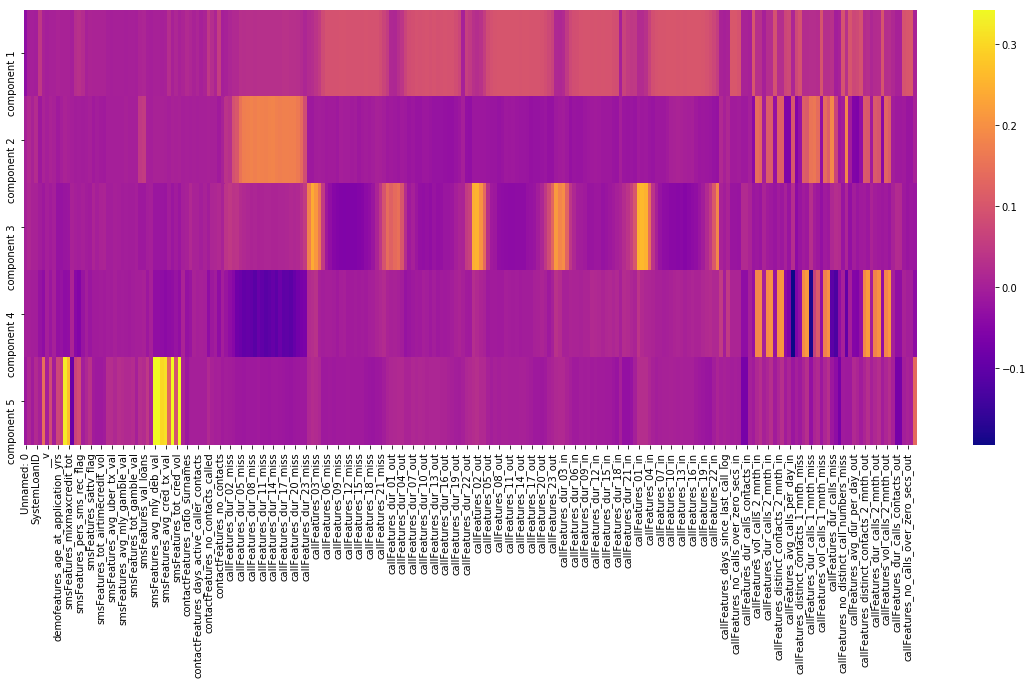

In [22]:
plt.figure(figsize=(20,8))
sns.heatmap(componentsDF,cmap='plasma')

In [23]:
kmeans = KMeans(n_clusters=3)

In [24]:
kmeans.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
clusters = kmeans.predict(principalDf)

In [26]:
print(clusters)

[0 1 0 ... 0 0 0]


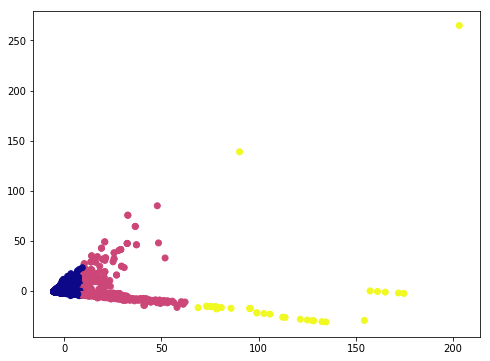

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(principalDf['component 1'], principalDf['component 2'], c=clusters, cmap='plasma')

In [28]:
# Connect the final clusters of each observation to the original dataframe
df['Cluster'] = pd.DataFrame(clusters)

In [29]:
df.head()

,Unnamed: 0,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,...,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId,Cluster
0,0,201812,Client did not meet approval score.,WRYRieZlqBsT6w53b2HDpA_1544015103274,334043596,302881418623,credit,True,1,NG,...,0.0,48872.0,0.985554,0.929771,139.0,287.0,655.0,105872.674499,374ac87639a74b3e01465993be618360,0
1,1,201809,Client did not meet approval score.,oVpQz7tgkPa3bmvVDzYqw_1530858694219,524284563,302328949395,credit,True,4,NG,...,0.0,65335.0,0.956868,0.917550,327.0,1114.0,2923.0,34421.220891,e24749e856614a1ae3734c773670f74c,1
2,2,201810,Client did not meet approval score.,WCONqdL9BlaRetaDRERg_1538822524979,481582700,302536536368,credit,True,2,NG,...,0.0,98762.0,0.000000,0.000000,139.0,583.0,1115.0,14447.944277,abe46a8fe9345c0b230c3fcaa5ddbbbc,0
3,3,201812,Client did not meet approval score.,Wi5dgyaoGQ9yciK89PEg_1544071630964,234330495,302887567434,credit,True,1,NG,...,0.0,1530.0,0.762092,0.777778,46.0,38.0,108.0,52952.581832,cfe3f3006f8e9799e9d17859df394b18,0
4,4,201901,Client did not meet approval score.,16JgKGioSsWVaWdY7noC8A_1547701922961,563455515,303057983993,credit,True,2,NG,...,0.0,29949.0,0.937828,0.938942,114.0,549.0,1474.0,31577.275467,7af8400ec773914c8d1fed044aa420b7,0


In [30]:
df.columns

Index(['Unnamed: 0', 'createdAt_Month', 'Reason', 'application_id',
       'SystemCustomerID', 'SystemLoanID', 'income_source', 'income_verified',
       'next_loan_number', 'country',
       ...
       'callFeatures_vol_calls_3_mnth_out', 'callFeatures_dur_calls_out',
       'callFeatures_dur_calls_contacts_out',
       'callFeatures_ratio_contacts_out',
       'callFeatures_no_distinct_call_numbers_out',
       'callFeatures_no_calls_over_zero_secs_out', 'callFeatures_no_calls_out',
       'predictedIncome', 'installationId', 'Cluster'],
      dtype='object', length=273)

Exploratory Data Analysis

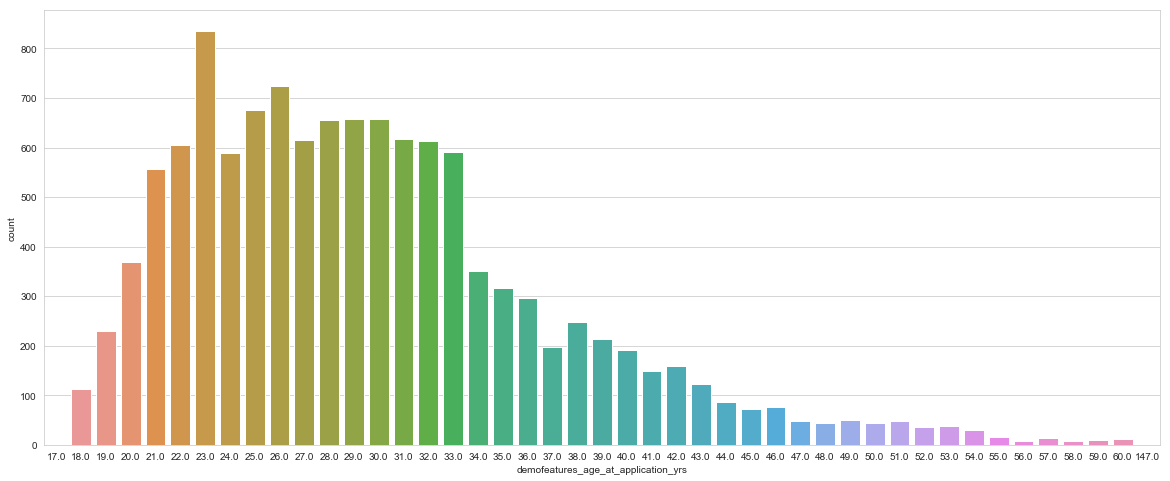

In [31]:
# To see the number of applicants within each age group
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.countplot('demofeatures_age_at_application_yrs', data=df)

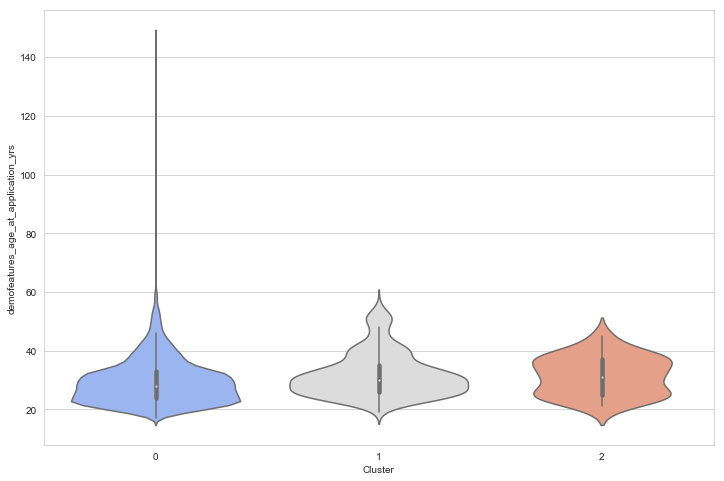

In [32]:
# To see the age distribution of applicants within each cluster
plt.figure(figsize=(12,8))
sns.violinplot(x='Cluster', y='demofeatures_age_at_application_yrs', data=df, palette='coolwarm')

In [33]:
df['income_source'].value_counts()

credit           8400
salary           2195
pension           993
ivy               404
legacy-income       1
Name: income_source, dtype: int64

In [35]:
df['predictedIncome'].groupby(df['Cluster']).mean()

Cluster
0    37589.374521
1    43223.926722
2    57441.201649
Name: predictedIncome, dtype: float64